<a href="https://colab.research.google.com/github/Vaibhav-chauhan11/Mathematics_for_Machine_Learning/blob/main/pca_lda_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
class PCA:
  def __init__(self,n_components):
    self.n_components=n_components
    self.components = None
    self.mean= None
  def fit(self,X):
    #mean
    self.mean = np.mean(X, axis=0)
    X= X-self.mean

    #covariance
    cov = np.cov(X.T)

    #eigenvector and eigenvalues
    eigenvalues , eigenvectors = np.linalg.eig(cov)
    #v[:,i]
    #sort eigenvectors
    eigenvectors = eigenvectors.T
    idxs = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idxs]
    eigenvectors = eigenvectors[idxs]

    #store first n eigenvectors
    self.components = eigenvectors[0:self.n_components]
  def transform(self,X):
    #project data
    X= X-self.mean
    return np.dot(X,self.components.T)

Shape of X0 (150, 4)
Shape of transformed X: (150, 2)


/tmp/ipython-input-788234981.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  x1,x2,c=y,edgecolor='none',alpha=0.8,cmap=plt.cm.get_cmap('viridis',3)


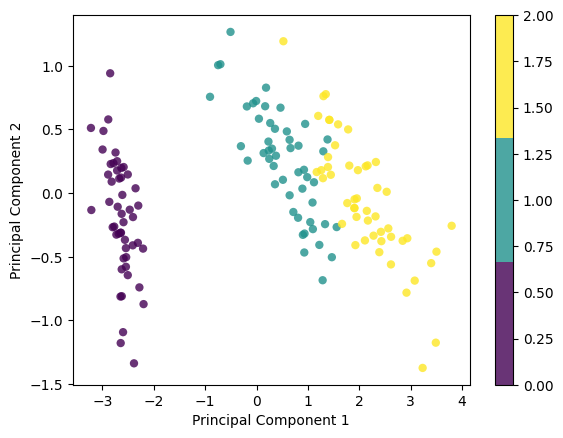

In [6]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#dataset
data = datasets.load_iris()
X= data.data
y = data.target
#150,4
# projection data onto 2 primary component
pca = PCA(2)
pca.fit(X)
X_projected = pca.transform(X)

print('Shape of X0',X.shape)
print('Shape of transformed X:',X_projected.shape)
x1 = X_projected[:,0]
x2 = X_projected[:,1]
plt.scatter(
    x1,x2,c=y,edgecolor='none',alpha=0.8,cmap=plt.cm.get_cmap('viridis',3)
)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

LDA


In [13]:
from pickle import NONE
import numpy as np
class LDA:
  def __init__(self,n_components):
    self.n_components = n_components
    self.linear_discriminants = None
  def fit(self,X,y):
    n_features = X.shape[1] #150,4
    class_lables = np.unique(y)
    #S_w ,S_B scatter matix for in class and between class
    mean_overall = np.mean(X,axis=0)
    S_w = np.zeros((n_features,n_features)) #4,4
    S_b = np.zeros((n_features,n_features))  #4,4
    for c in class_lables:
      X_c = X[y==c]
      mean_c = np.mean(X_c,axis=0)
      #(4,n_c)* (n_c,4) = (4,4)
      S_w += (X_c-mean_c).T.dot((X_c-mean_c))
      n_c = X_c.shape[0]
      #(4,1)* (4,1)T = (4,4)
      mean_diff = (mean_c-mean_overall).reshape(n_features,1)
      S_b += n_c*(mean_diff).dot(mean_diff.T)
    A = np.linalg.inv(S_w).dot(S_b)
    eigenvalues,eigenvectors = np.linalg.eig(A)
    eigenvectors = eigenvectors.T
    idxs = np.argsort(abs(eigenvalues))[::-1]
    eigenvalues = eigenvalues[idxs]
    eigenvectors = eigenvectors[idxs]
    self.linear_discriminants = eigenvectors[0:self.n_components]
  def transform(self,X):
    #project data
    return X.dot(self.linear_discriminants.T)

Shape of X0 (150, 4)
Shape of transformed X: (150, 2)


/tmp/ipython-input-1097099548.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  x1,x2,c=y,edgecolor='none',alpha=0.8,cmap=plt.cm.get_cmap('viridis',3)


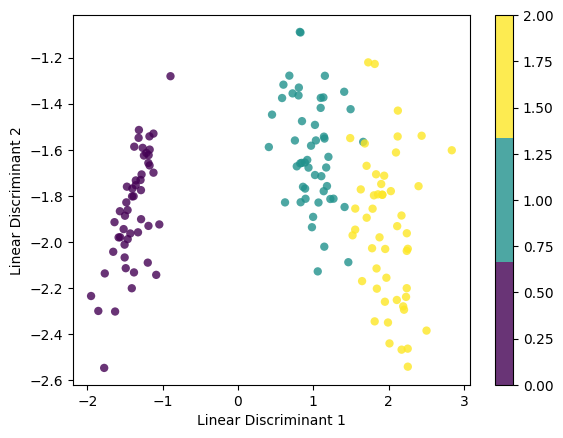

In [14]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#dataset
data = datasets.load_iris()
X= data.data
y = data.target
#150,4
# projection data onto 2 primary component
lda = LDA(2)
lda.fit(X,y)
X_projected = lda.transform(X)

print('Shape of X0',X.shape)
print('Shape of transformed X:',X_projected.shape)
x1 = X_projected[:,0]
x2 = X_projected[:,1]
plt.scatter(
    x1,x2,c=y,edgecolor='none',alpha=0.8,cmap=plt.cm.get_cmap('viridis',3)
)
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.colorbar()
plt.show()